In [1]:
# Reference https://towardsdatascience.com/a-step-by-step-tutorial-using-k-means-to-extract-image-color-themes-43e04808b2be

In [2]:

import matplotlib.pyplot as plt
from matplotlib import image as img
image = img.imread('../images/bacteria_leaf.JPG')
image.shape

(256, 256, 3)

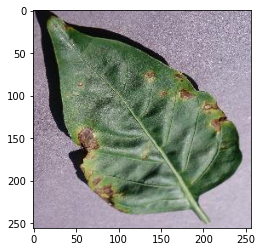

In [3]:
plt.imshow(image)

In [4]:
image.dtype   # dtype function tells how bytes in memory will be                         interpreted eg float/int
              # uint8 is an 8 bit unsigned integer ( 0 through 255 decimal)

dtype('uint8')

In [5]:
type(image)  # type function tells datatype

numpy.ndarray

In [6]:
print(image)

[[[155 141 158]
  [120 106 123]
  [ 31  18  35]
  ...
  [159 150 169]
  [148 139 158]
  [149 140 159]]

 [[147 133 150]
  [126 112 129]
  [ 45  32  49]
  ...
  [154 145 164]
  [169 160 179]
  [154 145 164]]

 [[152 138 155]
  [151 137 154]
  [ 80  67  84]
  ...
  [130 121 140]
  [166 157 176]
  [167 158 177]]

 ...

 [[164 151 171]
  [159 146 166]
  [157 144 164]
  ...
  [201 192 209]
  [201 192 209]
  [200 191 208]]

 [[162 149 169]
  [159 146 166]
  [162 149 169]
  ...
  [200 191 208]
  [199 190 207]
  [198 189 206]]

 [[174 161 181]
  [166 153 173]
  [161 148 168]
  ...
  [198 189 206]
  [196 187 204]
  [195 186 203]]]


In [7]:
image.shape  # Image Height*Width*3 (Channels / RGB)

(256, 256, 3)

In [8]:
image

array([[[155, 141, 158],
        [120, 106, 123],
        [ 31,  18,  35],
        ...,
        [159, 150, 169],
        [148, 139, 158],
        [149, 140, 159]],

       [[147, 133, 150],
        [126, 112, 129],
        [ 45,  32,  49],
        ...,
        [154, 145, 164],
        [169, 160, 179],
        [154, 145, 164]],

       [[152, 138, 155],
        [151, 137, 154],
        [ 80,  67,  84],
        ...,
        [130, 121, 140],
        [166, 157, 176],
        [167, 158, 177]],

       ...,

       [[164, 151, 171],
        [159, 146, 166],
        [157, 144, 164],
        ...,
        [201, 192, 209],
        [201, 192, 209],
        [200, 191, 208]],

       [[162, 149, 169],
        [159, 146, 166],
        [162, 149, 169],
        ...,
        [200, 191, 208],
        [199, 190, 207],
        [198, 189, 206]],

       [[174, 161, 181],
        [166, 153, 173],
        [161, 148, 168],
        ...,
        [198, 189, 206],
        [196, 187, 204],
        [195, 186, 203]]

In [9]:
image[:,:,0]   # red

array([[155, 120,  31, ..., 159, 148, 149],
       [147, 126,  45, ..., 154, 169, 154],
       [152, 151,  80, ..., 130, 166, 167],
       ...,
       [164, 159, 157, ..., 201, 201, 200],
       [162, 159, 162, ..., 200, 199, 198],
       [174, 166, 161, ..., 198, 196, 195]], dtype=uint8)

In [10]:
image[:,:,1]   # green

array([[141, 106,  18, ..., 150, 139, 140],
       [133, 112,  32, ..., 145, 160, 145],
       [138, 137,  67, ..., 121, 157, 158],
       ...,
       [151, 146, 144, ..., 192, 192, 191],
       [149, 146, 149, ..., 191, 190, 189],
       [161, 153, 148, ..., 189, 187, 186]], dtype=uint8)

In [11]:
image[:,:,2]   # blue

array([[158, 123,  35, ..., 169, 158, 159],
       [150, 129,  49, ..., 164, 179, 164],
       [155, 154,  84, ..., 140, 176, 177],
       ...,
       [171, 166, 164, ..., 209, 209, 208],
       [169, 166, 169, ..., 208, 207, 206],
       [181, 173, 168, ..., 206, 204, 203]], dtype=uint8)

In [12]:
# Rows & columns in ndarray

numrows = len(image)
numcols = len(image[0])
print(numrows)
print(numcols)


256
256


In [13]:
# Step 1 Detect/Extract Image's RGB

import pandas as pd
#construct to a dataframe for future data process
df = pd.DataFrame()
df['r']=pd.Series(image[:,:,0].flatten())
df['g']=pd.Series(image[:,:,1].flatten())
df['b']=pd.Series(image[:,:,2].flatten())
df.head()

,r,g,b
0,155,141,158
1,120,106,123
2,31,18,35
3,30,19,35
4,27,19,32


In [14]:
df.info()   # 533 rows * 800 columns = 426400 values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65536 entries, 0 to 65535
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   r       65536 non-null  uint8
 1   g       65536 non-null  uint8
 2   b       65536 non-null  uint8
dtypes: uint8(3)
memory usage: 192.1 KB


In [15]:
# Step 2 Data Preprocessing
# Whiten to standardise pixel data

from scipy.cluster.vq import whiten

df['r_whiten'] = whiten(df['r'])
df['g_whiten'] = whiten(df['g'])
df['b_whiten'] = whiten(df['b'])
df.head()

,r,g,b,r_whiten,g_whiten,b_whiten
0,155,141,158,2.993611,3.244671,2.821170
1,120,106,123,2.317634,2.439256,2.196228
2,31,18,35,0.598722,0.414213,0.624943
3,30,19,35,0.579409,0.437225,0.624943
4,27,19,32,0.521468,0.437225,0.571376


In [16]:
# Step 3 K-means cluster
# We aim to find 4 main colors from the image ## Assumption cz we
# know about data and our interest to find color other than  green
# based on the problem ##
# [Background, Shades of Green, Anomaly - rust, black spot etc]

from scipy.cluster.vq import kmeans
cluster_centers, distortion = kmeans(df[['r_whiten','g_whiten','b_whiten' ]], 10)
cluster_centers  # Since we want 4 clusters hence 4 cluster_centres for
                 # each r,g,b

# kmeans returns two values cluster_centers and distortions. For our purpose, only cluster_centers value is used.

array([[0.34842042, 0.48274663, 0.3120772 ],
       [2.7330534 , 2.94321455, 2.5679013 ],
       [1.4932851 , 2.26644846, 1.21723016],
       [1.99317044, 2.76315828, 1.65684729],
       [3.13269242, 3.43626552, 2.97222942],
       [3.44735275, 3.87541104, 3.2637104 ],
       [2.40724694, 3.29668897, 2.02235174],
       [0.94240258, 1.63361535, 0.74467493],
       [3.79251669, 4.31503593, 3.60185777],
       [2.91544415, 3.82468306, 2.42661286]])

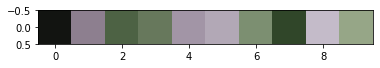

[(18, 20, 17),
 (141, 127, 143),
 (77, 98, 68),
 (103, 120, 92),
 (162, 149, 166),
 (178, 168, 182),
 (124, 143, 113),
 (48, 70, 41),
 (196, 187, 201),
 (150, 166, 135)]

In [17]:
# Restore R,G,B
# Cluster_center consist of standardized values that will need to restore to the real R, G, B to retrieve the colors.

# imshow could show image either within 0 to 1 float or 0 to 255 int. So we use int() to return the integer values for each cluster center.
# std() returns the standard deviation.

r_std, g_std, b_std = df[['r','g','b']].std()

colors = []

for color in cluster_centers:
    sr,sg,sb = color
    colors.append((int(sr*r_std),int(sg*g_std), int(sb*b_std)))

plt.imshow([colors])
plt.show()
colors